In [2]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [12]:
merged_df = pd.read_csv('./240404_meged.csv')
merged_df = merged_df[merged_df['model'] != 'WeightedEnsemble_L2']
merged_df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])

In [13]:
merged_df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
0,ECOD,0.003704,0.591404,0.003553,0.843750,0.007076,0.717359,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
1,GMM,0.082634,0.692003,0.003410,0.609375,0.006782,0.650760,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
2,HBOS,0.002123,0.936368,0.020868,0.781250,0.040650,0.858943,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
3,IForest,0.144727,0.815358,0.007263,0.781250,0.014393,0.798334,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
4,INNE,0.326223,0.766636,0.005070,0.687500,0.010065,0.727136,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,LODA,1.380267,0.990775,0.000000,0.000000,0.000000,0.499843,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116
2031,LOF,1.171791,0.982414,0.001378,0.001345,0.001361,0.496291,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116
2032,MCD,0.101797,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116
2033,PCA,0.029553,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116


`-` 전체 데이터, train, test data의 비율이 비슷한 것 추출

In [14]:
filtered_df = merged_df[merged_df['diff'] < 0.032]

In [15]:
filtered_df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
14,ECOD,0.119038,0.987053,0.194964,0.203367,0.199077,0.598335,False,pyod,0.008,563062,['amt'],0.008029,187688,0.007912,NaN,NaN,NaN,0.000117
15,GMM,0.144922,0.991166,0.442448,0.447811,0.445114,0.721655,False,pyod,0.008,563062,['amt'],0.008029,187688,0.007912,NaN,NaN,NaN,0.000117
16,HBOS,0.016834,0.991758,0.000000,0.000000,0.000000,0.499834,False,pyod,0.008,563062,['amt'],0.008029,187688,0.007912,NaN,NaN,NaN,0.000117
17,IForest,13.051786,0.991182,0.443106,0.445791,0.444444,0.720662,False,pyod,0.008,563062,['amt'],0.008029,187688,0.007912,NaN,NaN,NaN,0.000117
18,INNE,19.702755,0.991315,0.449265,0.432323,0.440631,0.714048,False,pyod,0.008,563062,['amt'],0.008029,187688,0.007912,NaN,NaN,NaN,0.000117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,LODA,1.380267,0.990775,0.000000,0.000000,0.000000,0.499843,False,pyod,0.009,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116
2031,LOF,1.171791,0.982414,0.001378,0.001345,0.001361,0.496291,False,pyod,0.009,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116
2032,MCD,0.101797,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116
2033,PCA,0.029553,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN,0.000116


In [16]:
def plot_merged_df(merged_df):

    filtered_df = merged_df[merged_df['diff'] < 0.032]

    filtered_df = filtered_df.sort_values(by=['throw_rate', 'model', 'auc'], ascending=[True, True, False]) \
        .drop_duplicates(subset=['throw_rate', 'model'])

    fig, ax = plt.subplots()
    for model, group in filtered_df.groupby('model'):
        ax.plot(group['throw_rate'], group['auc'], label=model)
    ax.set_xlabel('Throw Rate')
    ax.set_ylabel('AUC')
    ax.set_xlim(0.01, 0.5)
    ax.set_ylim(0.85, 1)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()  

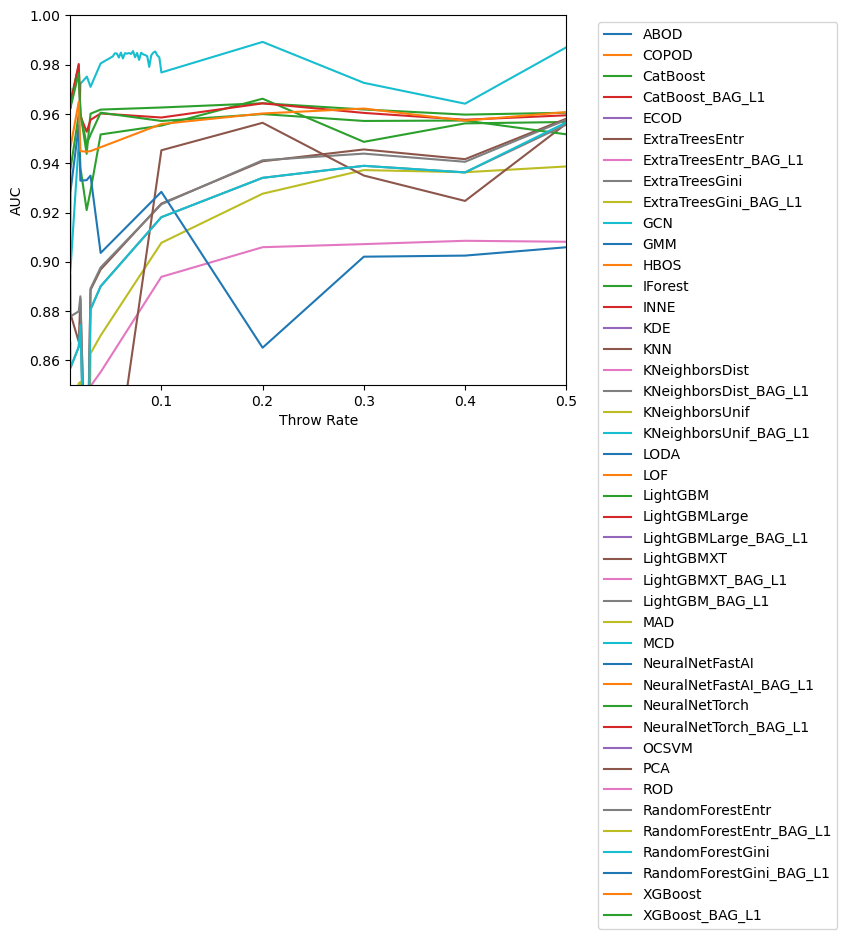

In [17]:
plot_merged_df(merged_df)


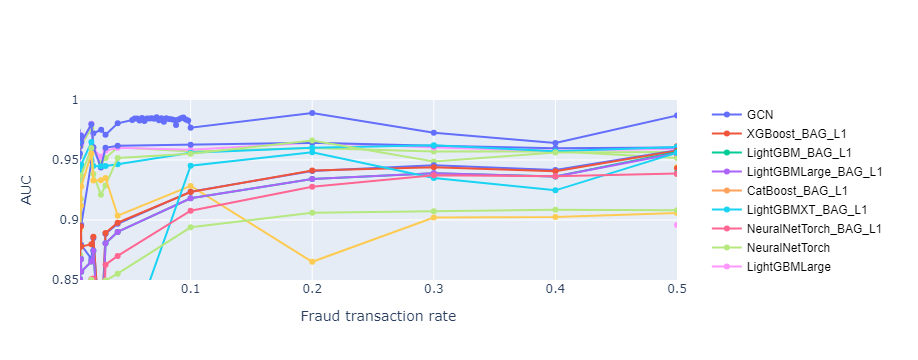

In [18]:
import plotly.graph_objects as go

def plot_merged_df3(merged_df):

    filtered_df = merged_df[merged_df['diff'] < 0.032]


    filtered_df = filtered_df.sort_values(by=['throw_rate', 'model', 'auc'], ascending=[True, True, False]) \
        .drop_duplicates(subset=['throw_rate', 'model'])

    label_order = filtered_df.groupby('model')['auc'].mean().sort_values(ascending=False).index

    fig = go.Figure()
    for model in label_order:
            group = filtered_df[filtered_df['model'] == model]
            fig.add_trace(go.Scatter(
                x=group['throw_rate'],
                y=group['auc'],
                mode='lines+markers',
                name=model
            ))

    fig.update_layout(
        xaxis_title='Fraud transaction rate',
        yaxis_title='AUC',
        xaxis=dict(range=[0.009, 0.5]),
        yaxis=dict(range=[0.85, 1]),
        legend=dict(
            x=1.05,
            y=1,
            traceorder='normal',
            font=dict(
                family='Arial',
                size=12,
                color='black'
            ),
           # bgcolor='LightSteelBlue',
         #   bordercolor='Black',
         #   borderwidth=1
        )
    )

    fig.show()


plot_merged_df3(merged_df)
